Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [1]:
NAME = "PUNTAKARN KAEWSANGHAN"
STUDENT_ID = "61070139"

---

# 1 Least Squares

**The dataset can be downloaded at https://bit.ly/2RZ15t2**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Load a dataset from `ex1_x.csv` as $x$ and `ex1_z.csv` as $z$

In [3]:
x = np.genfromtxt('DataSet/ex1_x.csv', delimiter=',').reshape(-1, 1)
z = np.genfromtxt('DataSet/ex1_z.csv', delimiter=',').reshape(-1, 1)

In [4]:
assert x.shape in [(10, 1), (10,)]
assert z.shape in [(10, 1), (10,)]

## 1.2 Concatenate a bias vector with $x$ as a new matrix $X$

In [5]:
bias = np.ones((x.shape[0], 1))
X = np.hstack((bias, x))
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [6]:
assert X.shape == (10, 2)

## 1.3 Find the Least-squares solution by using the following equation.

$$
\hat{\theta} = (X^TX)^{-1}X^Tz
$$

In [7]:
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), z)
theta

array([[ 3.48606   ],
       [-1.17832036]])

## 1.4 Plot the Least-squares estimation of the function.

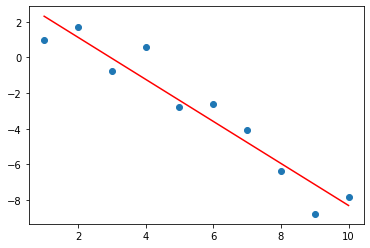

In [8]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, theta), 'r')

## 1.5 Plot the true function with $\theta = [3.75, -1.15]^T$

In [9]:
true_theta = np.array([
    [3.75],
    [-1.15]
])

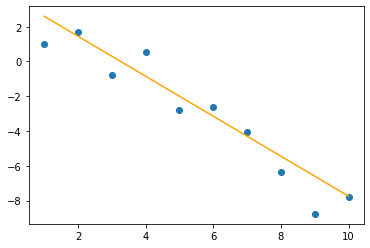

In [10]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, true_theta), 'orange')

## 1.6 Plot the measured data.

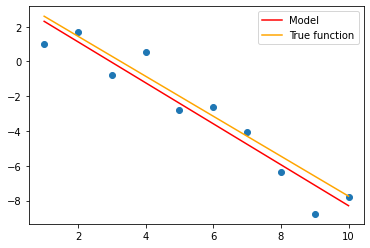

In [11]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, theta), label="Model", color='r')
plt.plot(x, np.dot(X, true_theta), label="True function", color='orange')
plt.legend()

## 1.7 Observe and discuss the results in Question 4-6

YOUR ANSWER HERE

In [12]:
# Show comparison between model predicted data (Model) and real data added noisy (True function)

## 1.8 Find the Least-squares solution by using pseudo-inverse

In [13]:
theta = np.dot(np.linalg.pinv(X), z)
theta

array([[ 3.48606   ],
       [-1.17832036]])

## 1.9 Plot the Least-squares estimation of the function calculated by pseudo-inverse.

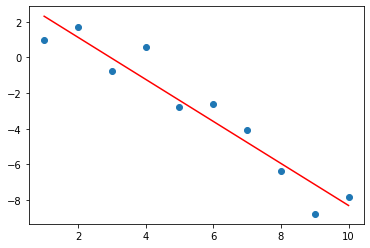

In [14]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, theta), 'r')

## 1.10 Discuss on what you observe

YOUR ANSWER HERE

In [15]:
# Least-squares are calculated by the pseudo-inverse method and the normal inverse can give theta the same value

# 2 Least-Squares - Multivariate Linear Regression

After the first lab session, I believe that you all get to know the Boston Housing Dataset. Thus, I do not need to give you any explaination about the data. The dataset can be downloaded at https://bit.ly/2NBaO7e.

## 2.1 Import dataset from `regression-datasets-housing.csv`

In [16]:
# YOUR CODE HERE
data = np.genfromtxt('DataSet/regression-datasets-housing.csv', delimiter=',')
column_num = np.arange(13)
X = data[:, column_num]
y = data[:, [13]]

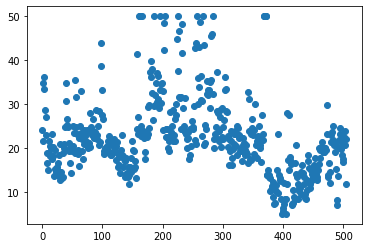

In [17]:
assert X.shape in [(506, 13)]
assert y.shape in [(506, 1)]

plt.scatter(np.arange(X.shape[0]), y);

## 2.2 Find theta by using Gradient Descent Algorithm

In [18]:
# YOUR CODE HERE

"""Before"""
print("-------------------- Before --------------------")
for i in range(13):
    print("Column %d Mean : %.2f, STD : %.2f" %(i+1, np.mean(X[:, [i]]), np.std(X[:, [i]])))

"""Normalise this data"""
for i in range(13):
    mean = np.mean(X[:, [i]])
    std = np.std(X[:, [i]])
    X[:, [i]] = (X[:, [i]] - mean)/std

"""After"""
print("--------------------- After ---------------------")
for i in range(13):
    print("Column %d Mean : %.2f, STD : %.2f" %(i+1, np.mean(X[:, [i]]), np.std(X[:, [i]])))

-------------------- Before --------------------
Column 1 Mean : 3.61, STD : 8.59
Column 2 Mean : 11.35, STD : 23.29
Column 3 Mean : 11.14, STD : 6.85
Column 4 Mean : 0.07, STD : 0.25
Column 5 Mean : 0.55, STD : 0.12
Column 6 Mean : 6.28, STD : 0.70
Column 7 Mean : 68.57, STD : 28.12
Column 8 Mean : 3.80, STD : 2.10
Column 9 Mean : 9.55, STD : 8.70
Column 10 Mean : 408.24, STD : 168.37
Column 11 Mean : 18.08, STD : 2.28
Column 12 Mean : 356.67, STD : 91.20
Column 13 Mean : 12.65, STD : 7.13
--------------------- After ---------------------
Column 1 Mean : -0.00, STD : 1.00
Column 2 Mean : 0.00, STD : 1.00
Column 3 Mean : 0.00, STD : 1.00
Column 4 Mean : -0.00, STD : 1.00
Column 5 Mean : -0.00, STD : 1.00
Column 6 Mean : -0.00, STD : 1.00
Column 7 Mean : -0.00, STD : 1.00
Column 8 Mean : -0.00, STD : 1.00
Column 9 Mean : -0.00, STD : 1.00
Column 10 Mean : 0.00, STD : 1.00
Column 11 Mean : -0.00, STD : 1.00
Column 12 Mean : -0.00, STD : 1.00
Column 13 Mean : -0.00, STD : 1.00


In [19]:
# YOUR CODE HERE
"""Add Bias"""
bias = np.ones((X.shape[0], 1))
X = np.hstack((bias, X))

In [20]:
# YOUR CODE HERE
"""Cost Function"""
def computeCostFunction(X, y, theta):
    hx = np.dot(X, theta)
    n = X.shape[0]
    return (1/(2*n))*np.sum((hx - y)**2)

"""Gradient Descent Function"""
def gradientDescent(X, y, theta, alpha, n_iteration):
    j_history = []
    theta_history = []
    n = X.shape[0]
    
    for i in range(n_iteration):
        prediction = np.dot(X, theta)
        loss = computeCostFunction(X, y, theta)
        
        # Calculate gradient descent
        gradient = X.T.dot(prediction - y) * (1/n)
        theta = theta - alpha * gradient
        
        print("Iteration %d: %f (loss)" %(i+1, loss))
        j_history.append(loss)
        theta_history.append(theta)
    
    print("Theta 0 : %f, Theta 1 : %f" %(theta[0], theta[1]))
    return theta_history, j_history

In [21]:
# YOUR CODE HERE
theta_history_1, j_history_1 = gradientDescent(X, y, theta=np.zeros((X.shape[1], 1)), alpha=0.1, n_iteration=1000)

Iteration 1: 296.073458 (loss)
Iteration 2: 231.257849 (loss)
Iteration 3: 187.751607 (loss)
Iteration 4: 153.919005 (loss)
Iteration 5: 126.773084 (loss)
Iteration 6: 104.858139 (loss)
Iteration 7: 87.142241 (loss)
Iteration 8: 72.814182 (loss)
Iteration 9: 61.222591 (loss)
Iteration 10: 51.842220 (loss)
Iteration 11: 44.249099 (loss)
Iteration 12: 38.100866 (loss)
Iteration 13: 33.120990 (loss)
Iteration 14: 29.086054 (loss)
Iteration 15: 25.815517 (loss)
Iteration 16: 23.163455 (loss)
Iteration 17: 21.011898 (loss)
Iteration 18: 19.265462 (loss)
Iteration 19: 17.847007 (loss)
Iteration 20: 16.694137 (loss)
Iteration 21: 15.756377 (loss)
Iteration 22: 14.992885 (loss)
Iteration 23: 14.370612 (loss)
Iteration 24: 13.862808 (loss)
Iteration 25: 13.447819 (loss)
Iteration 26: 13.108113 (loss)
Iteration 27: 12.829496 (loss)
Iteration 28: 12.600470 (loss)
Iteration 29: 12.411722 (loss)
Iteration 30: 12.255708 (loss)
Iteration 31: 12.126314 (loss)
Iteration 32: 12.018585 (loss)
Iteration 3

## 2.3 Find theta by using Least-Squares

In [22]:
# YOUR CODE HERE
ls_theta = np.dot(np.linalg.pinv(X), y)
ls_theta

array([[22.53280632],
       [-0.9288962 ],
       [ 1.17144816],
       [ 0.18001873],
       [ 0.6582491 ],
       [-1.98608658],
       [ 2.71163714],
       [ 0.02973736],
       [-3.10610048],
       [ 2.73038415],
       [-2.1674497 ],
       [-2.01659509],
       [ 0.86009994],
       [-3.73465694]])

In [23]:
assert ls_theta.shape == (14, 1)

## 2.4 Compare an error between Gradient Descent Algorithm and Least-Squares.

What do you observe?

In [24]:
# YOUR CODE HERE
loss = computeCostFunction(X , y, ls_theta)
loss

10.995361606369448

YOUR ANSWER HERE

In [25]:
print('Gradient Descent Algorithm :', j_history_1[-1])
print('Least-Squares              :', loss)

Gradient Descent Algorithm : 10.995362818059487
Least-Squares              : 10.995361606369448


In [26]:
# Observing the render above, using Least-Squares and Gradient bars produces almost the same low error value.
# The difference is that the Gradient Descent has to set iteration and learning rate appropriately to achieve a low value.
# If iteration is not set well, the value will not be as low as Least Squares.

## 2.5 Can these two algorithms obtain the optimal solutions?

YOUR ANSWER HERE

In [27]:
# Both algorithms are able to find the best value. The two values may be approximately the same. but not the same 100%

## 2.6 Plot the importance of all the features.

Which features is the most importance features in this dataset?

In [28]:
# YOUR CODE HERE
df = pd.DataFrame(abs(ls_theta),columns = ['Least-Squares'])
df['Gradient'] = abs(theta_history_1[-1])
df['Different'] = abs(df['Least-Squares'] - df['Gradient'])
df

,Least-Squares,Gradient,Different
0,22.532806,22.532806,1.776357e-14
1,0.928896,0.928612,2.838922e-04
2,1.171448,1.170967,4.813264e-04
3,0.180019,0.178462,1.556359e-03
4,0.658249,0.658476,2.266394e-04
5,1.986087,1.985786,3.004687e-04
6,2.711637,2.711922,2.851596e-04
7,0.029737,0.029490,2.474838e-04
8,3.106100,3.106223,1.224293e-04
9,2.730384,2.726473,3.911089e-03


Text(0.5, 1.0, 'Compare an error between Gradient Descent Algorithm and Least-Squares')

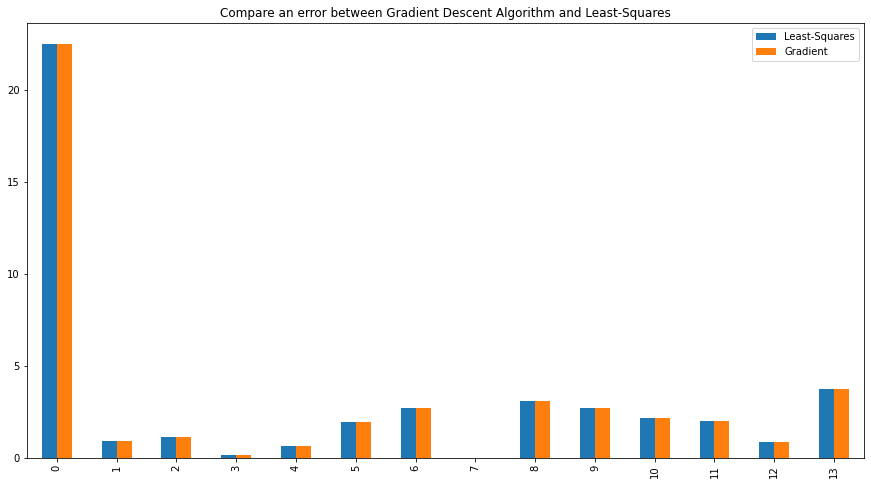

In [29]:
df[['Least-Squares', 'Gradient']].plot.bar(figsize=(15,8))
plt.title('Compare an error between Gradient Descent Algorithm and Least-Squares')


In [30]:
# From the graph, the 1st feature is of utmost importance.

# 3. Least-Squares - Non-linear Data

## 3.1 Import dataset from `ex2_x.csv` as $x$ and `ex2_z.csv` as $Z$.

It is noted that $z$ in generated by sine function with Gaussian random noise (S.D.=0.2).

In [31]:
x = np.genfromtxt('DataSet/ex2_x.csv', delimiter=',')
z = np.genfromtxt('DataSet/ex2_z.csv', delimiter=',')

In [32]:
x = np.expand_dims(x, axis=0).T
z = np.expand_dims(z, axis=0).T

In [33]:
print("x =", x.shape)
print("z =", z.shape)

x = (101, 1)
z = (101, 1)


## 3.2 Plot the data distribution

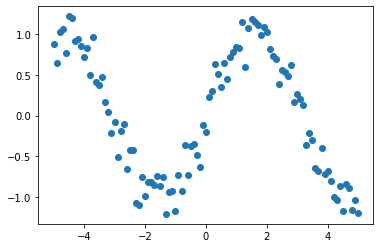

In [34]:
plt.scatter(x, z)

## 3.3 Obtain the least-squares solution of $x$ and $z$ and overlay the obtain function on the data distribution you plot in the previous question.

Discuss on the results you get.

In [35]:
X = np.hstack((np.ones((x.shape[0], 1)), x))
ls_theta = np.dot(np.linalg.pinv(X), z)
# ls_theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), z)

In [36]:
ls_theta

array([[ 0.00713729],
       [-0.06496448]])

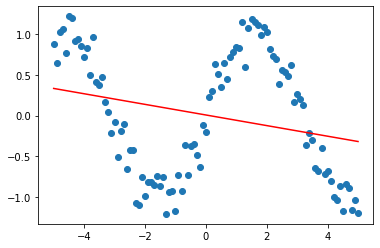

In [37]:
plt.scatter(x, z)
plt.plot(x, np.dot(X, ls_theta), color='r')

In [38]:
# from the graph The prediction line does not follow the trend of the data
# because the nature of the data is curved up and down.
# And this equation is used as Linear Regression.

## 3.4 Find a series of models by increasing the polynomial degree

In [39]:
# YOUR CODE HERE
"""Polynomial Degree Function"""
def compute_poly(x_test,y_test,degree):
    X_lin = np.linspace(x_test.min()-0.5, x_test.max()+0.5, 101).reshape(-1, 1)
    bias_1 = np.ones((X_lin.shape[0] , 1))
    bias_2 = np.ones((x_test.shape[0] , 1))
    list_poly = []
    
    for i in range(0,degree):
        bias_1 = np.hstack((bias_1, X_lin**(i+1)))
        bias_2 = np.hstack((bias_2,x_test**(i+1)))
        poly = np.dot(np.linalg.pinv(bias_2) , y_test)
        y = np.dot(bias_1, poly)
        list_poly.append(poly)
        
    return list_poly, bias_1, X_lin,y, bias_2

In [40]:
poly, bias_1, X_lin, y, bias_2 = compute_poly(x,z,5)
poly

[array([[ 0.00713729],
        [-0.06496448]]),
 array([[ 0.0164896 ],
        [-0.06496448],
        [-0.00110027]]),
 array([[ 0.0164896 ],
        [ 0.40991105],
        [-0.00110027],
        [-0.03104167]]),
 array([[-0.01972189],
        [ 0.40991105],
        [ 0.01310681],
        [-0.03104167],
        [-0.00065021]]),
 array([[-1.97218883e-02],
        [ 8.72391462e-01],
        [ 1.31068138e-02],
        [-1.15739532e-01],
        [-6.50209886e-04],
        [ 2.99109564e-03]])]

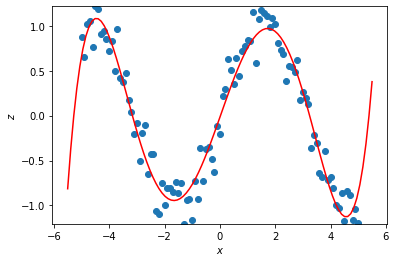

In [41]:
plt.scatter(x, z)
plt.plot(X_lin, y, color='r')
plt.ylim(z.min(), z.max())
plt.xlabel("$x$")
plt.ylabel("$z$")
plt.show()


## 3.5 Plot the result of each polynomial degree

In [42]:
def polynomial(degree, X, z):
    theta_list = []
    X_lin = np.linspace(X.min()-0.5, X.max()+0.5, 1000).reshape(-1, 1)
    poly_lin = np.ones((X_lin.shape[0], 1))
    
    # bias
    poly_x = np.ones((X.shape[0], 1))
    
    for i in range(1, degree+1):
        poly_lin = np.hstack((poly_lin, X_lin**i))
        poly_x = np.hstack((poly_x, X**i))
        
        theta = np.dot(np.linalg.pinv(poly_x), z)
        y = np.dot(poly_lin, theta)
        loss = computeCostFunction(poly_x,z,theta)
        
        plt.title("Polynomial %d degree(s)" %(i))
        plt.scatter(X, z)
        plt.plot(X_lin, y, color='r')
        plt.ylim(z.min(), z.max())
        plt.xlabel("$x$")
        plt.ylabel("$z$")
        plt.show()
        
        print('Loss :', loss,"\n\n\n\n")
        theta_list.append(theta)
    
    return theta_list

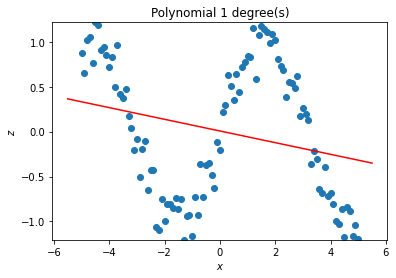

Loss : 0.2701003605678642 






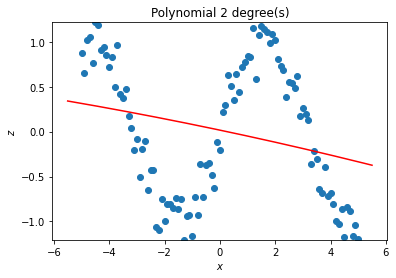

Loss : 0.27006538455088236 






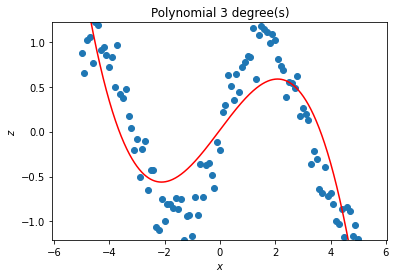

Loss : 0.08766143758835934 






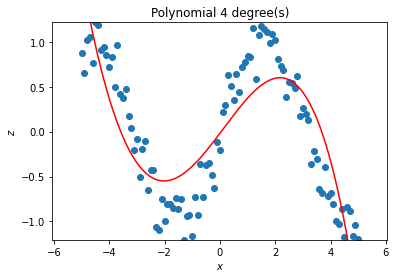

Loss : 0.0871439122825901 






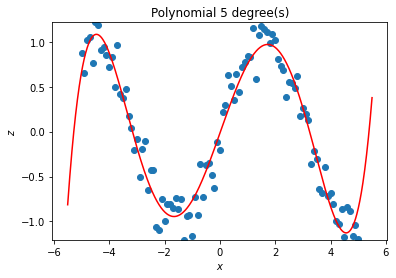

Loss : 0.016786966969982754 






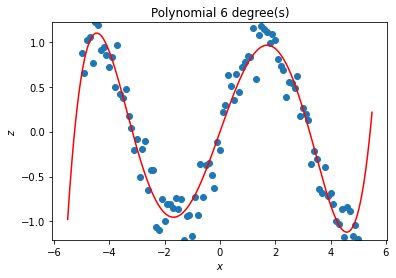

Loss : 0.01672073317440862 






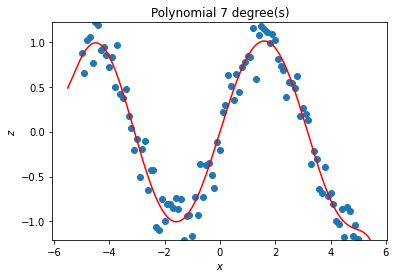

Loss : 0.014357803174334167 






In [43]:
theta_list = polynomial(7, x, z)

In [44]:
# It can be seen that from the 5th degree and above, the loss begins to decrease.

## 3.6 Discuss the experimental results

YOUR ANSWER HERE

In [45]:
# As a result of experimenting with polynomial equations, the higher the degree, the closer the Cruve is to the data or "Overfiting"

## 3.7 Plot the importance of all the polynomial degree.

Which degree(s) is/are the most importance feature? What is the appropiate number of degree?

Text(0.5, 1.0, 'the polynomial degree')

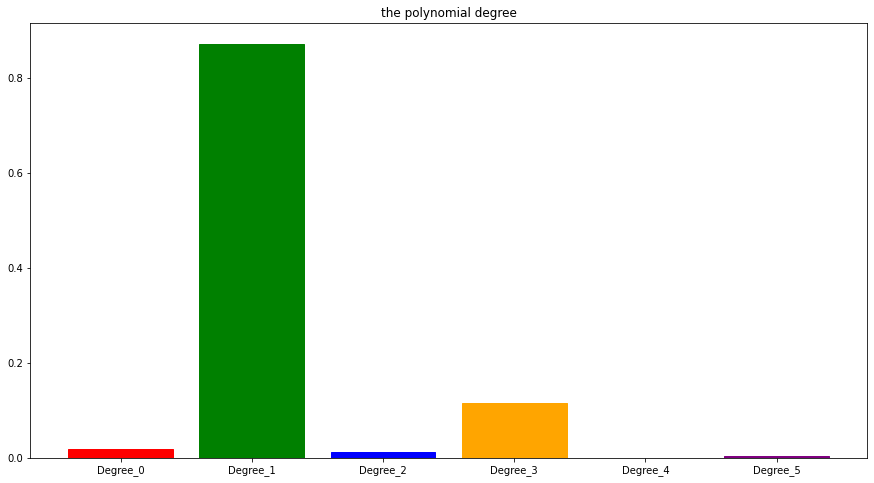

In [46]:
# YOUR CODE HERE
fig = plt.figure(figsize=(15, 8))
plot = plt.bar(['Degree_0','Degree_1','Degree_2','Degree_3','Degree_4','Degree_5'],abs(poly[-1]).reshape(-1))
plot[0].set_color('r')
plot[1].set_color('g')
plot[2].set_color('b')
plot[3].set_color('orange')
plot[4].set_color('brown')
plot[5].set_color('purple')
plt.title('the polynomial degree')

## 3.8 What happens if you drop the terms corresponding to the weights of smallest magnitude?

In [47]:
# YOUR CODE HERE
del_degree4 = np.delete(bias_1,4,axis=1)
del_theta_4 = np.delete(poly[-1],4,axis=0)
y_remove = np.dot(del_degree4, del_theta_4)
y_origi = np.dot(bias_1, poly[-1])


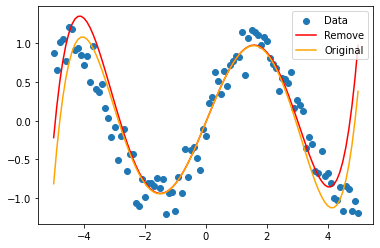

In [48]:
plt.scatter(x, z)
plt.plot(x, y_remove, color='r')
plt.plot(x, y_origi, color='orange')
plt.legend(['Data','Remove', 'Original'])


In [49]:
# It can be seen that if removing non-essential features (Degree_4) and predicting.
# You can see that the line has a slight deviation.

## 3.9 What happens if you drop those terms and then re-compute the model?

In [50]:
# YOUR CODE HERE
del_x_degree = np.delete(bias_2,4,axis=1)
poly_new = np.dot(np.linalg.pinv(del_x_degree) , z)
poly_new

array([[ 0.0164896 ],
       [ 0.87239146],
       [-0.00110027],
       [-0.11573953],
       [ 0.0029911 ]])

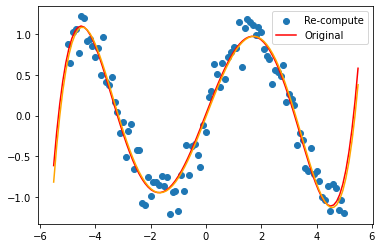

In [51]:
y_39 = np.dot(del_degree4, poly_new)
plt.scatter(x, z)
plt.plot(X_lin, y_39, color='r')
plt.plot(X_lin, y_origi, color='orange')
plt.legend(['Re-compute','Original'])


In [52]:
# If we remove unimportant features and retrain the model The model predicts the data.
# The results are very similar. with not removing that feature (Original)